<a href="https://colab.research.google.com/github/Esheshwari/python-programming/blob/main/APYCROP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data cleaning and preprocessing
#Loading the dataset
data=pd.read_csv('APY.csv')
#check duplicate values
print(data.duplicated().sum())
data['Production'].fillna(data['Production'].mean(), inplace=True)
data['Production']=data['Production'].astype(int)
data['Crop'].fillna(data['Crop'].mode()[0], inplace=True)
data['Crop']=data['Crop'].astype(str)
print(data.head())
print(data.isnull().sum())

0
                        State District       Crop  Crop_Year       Season  \
0  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Kharif        
1  Andaman and Nicobar Island  NICOBARS  Arecanut       2007  Rabi          
2  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Autumn        
3  Andaman and Nicobar Island  NICOBARS  Arecanut       2008  Summer        
4  Andaman and Nicobar Island  NICOBARS  Arecanut       2009  Autumn        

    Area   Production  Yield  
0  2439.6        3415   1.40  
1  1626.4        2277   1.40  
2  4147.0        3060   0.74  
3  4147.0        2660   0.64  
4  4153.0        3120   0.75  
State         0
District      0
Crop          0
Crop_Year     0
Season        0
Area          0
Production    0
Yield         0
dtype: int64


C:\Users\HP\AppData\Local\Temp\ipykernel_23576\1378320047.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Production'].fillna(data['Production'].mean(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_23576\1378320047.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

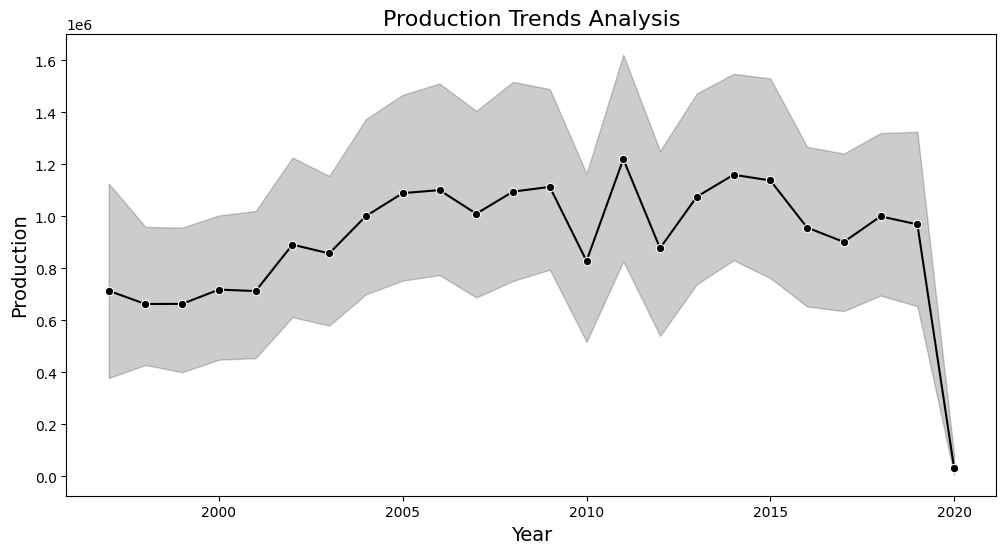

In [ ]:
#Visualizing the production trends over the years using a line plot
plt.figure(figsize=(12,6))
sns.lineplot(data=data, x='Crop_Year', y='Production', marker='o', color='black')
plt.title('Production Trends Analysis', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23576\2574666894.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_states, x='State', y='Production', palette='viridis')


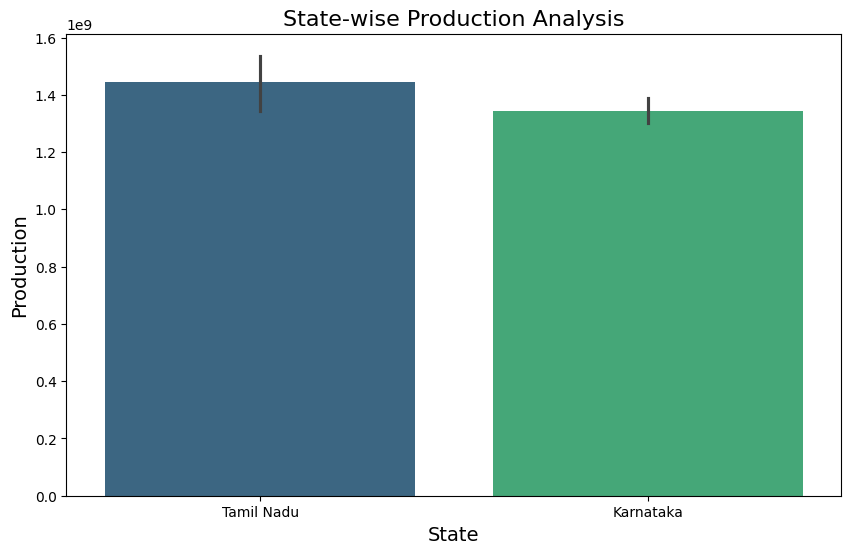

In [ ]:
#Analyzing which state have highest and which state have lowest production using a bar plot for top 10 states
top_states = data.nlargest(12, 'Production')
plt.figure(figsize=(10,6))
sns.barplot(data=top_states, x='State', y='Production', palette='viridis')
plt.title('State-wise Production Analysis', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Production', fontsize=14)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_23576\2662998440.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=top_Yield, x='Yield', y='State', palette='viridis')


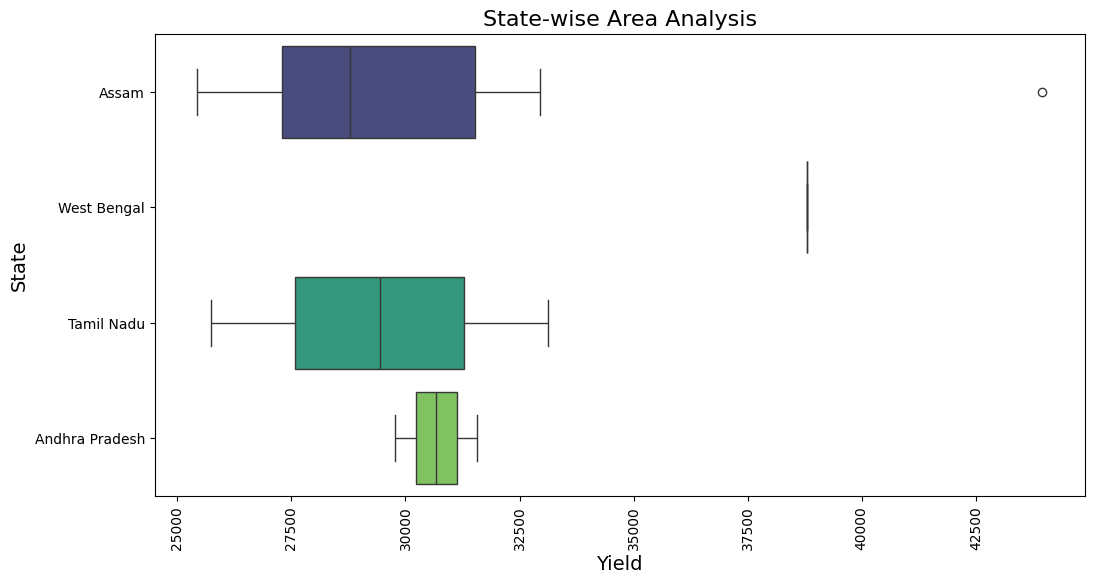

In [ ]:
#State-wise highest area analysis using a boxplot
top_Yield = data.nlargest(12, 'Yield')
plt.figure(figsize=(12,6))
sns.boxplot(data=top_Yield, x='Yield', y='State', palette='viridis')
plt.title('State-wise Area Analysis', fontsize=16)
plt.xlabel('Yield', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.xticks(rotation=90)
plt.show()

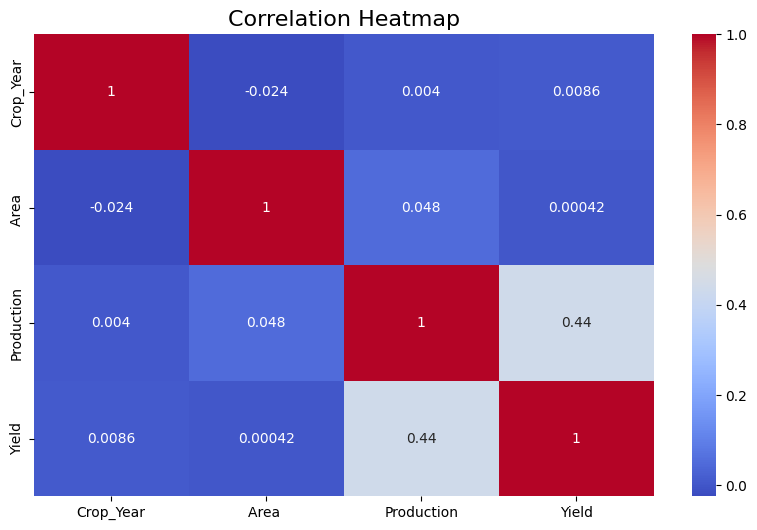

In [ ]:
#Analyzing the correlation between production and area using a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=['float64', 'int64', 'int32']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

🔹 Key Takeaways from Your Heatmap
✅ Production & Yield have a strong positive correlation (0.44) → Higher production tends to result in higher yield.
✅ Crop_Year vs. Area, Production, Yield shows weak or no correlation → This suggests crop year doesn't strongly affect these variables.
✅ Area vs. Production has a very low correlation (0.048) → Increasing land area doesn’t necessarily mean higher production, which could indicate inefficiencies or differing crop types

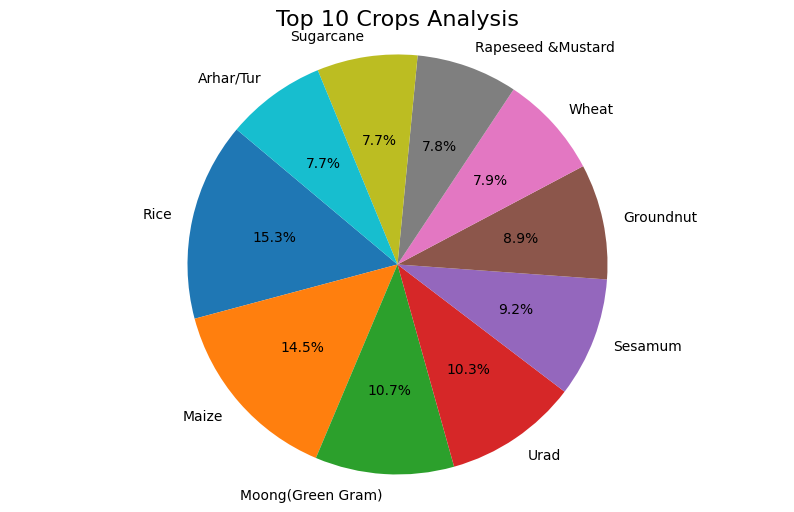

In [ ]:
#Analysis of the top 10 crops using a pie chart
top_crops = data['Crop'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
plt.pie(top_crops, labels=top_crops.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Crops Analysis', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()